In [111]:
# standard packages
import ast
import os
import sys


In [144]:
# extra to install packages
import urllib3
import pandas as pd
from tqdm import tqdm
import datetime
import matplotlib.pyplot as plt

In [113]:
# eigen packages modules
current_working_directory = os.getcwd()                                    
parent_working_directory = os.path.dirname(current_working_directory)      
scripts_directory = os.path.join(parent_working_directory, 'scripts')      
sys.path.append(scripts_directory)                                         
# sys.path.remove(scripts_directory)
# print(sys.path)

# Stap 1 : opladen van de gegevens

In [114]:
os.getcwd()
# os.path.join('..','data','waitings_times')
location_waiting_times = os.path.join('..','data','waiting_times')
os.listdir(location_waiting_times)

['7_dwarfs_train.csv',
 'alien_saucers.csv',
 'ariel_s_grotto.csv',
 'astro_orbiter.csv',
 'barnstormer.csv',
 'big_thunder_mtn.csv',
 'buzz_lightyear.csv',
 'carousel_of_progress.csv',
 'casey_jr_splash.csv',
 'country_bears.csv',
 'dinosaur.csv',
 'dumbo.csv',
 'enchanted_tiki_rm.csv',
 'ench_tales_w__belle.csv',
 'expedition_everest.csv',
 'flight_of_passage.csv',
 'hall_of_presidents.csv',
 'haunted_mansion.csv',
 'it_s_a_small_world.csv',
 'jungle_cruise.csv',
 'kilimanjaro_safaris.csv',
 'laugh_floor.csv',
 'liberty_sq_riverboat.csv',
 'mad_tea_party.csv',
 'magic_carpets.csv',
 'main_st_vehicles.csv',
 'navi_river.csv',
 'peoplemover.csv',
 'peter_pan_s_flight.csv',
 'pete_s__goofy_donald.csv',
 'pete_s__minnie_daisy.csv',
 'philharmagic.csv',
 'pirates_of_caribbean.csv',
 'pirate_s_adventure.csv',
 'princess_hall__cinderella_elena.csv',
 'princess_hall__rapunzel_tiana.csv',
 'regal_carrousel.csv',
 'rock_n_rollercoaster.csv',
 'slinky_dog.csv',
 'soarin.csv',
 'sorcerers_of_the

In [115]:
#  eerste poging met break
for filename in os.listdir(location_waiting_times):
    print(filename)
    break

7_dwarfs_train.csv


In [116]:
# verdere uitbreiding, nu alles gaan lezen
dfs = list()
for filename in os.listdir(location_waiting_times):
    df = pd.read_csv(os.path.join(location_waiting_times, filename))
    df['attraction'] = filename.replace('.csv','')
    dfs.append(df)
    break


In [117]:
#  controleren van de gevormde dataframe 
# df.head()

In [118]:
#  concateneren van alle dataframes in de lijst naar één groot dataframe
# dfs
# pd.concat(dfs)

In [119]:
#  final load van de gegevens, alle *.csv lezen in één groot dataframe
# om te weten hoe lang het dan wel zal duren, gebruikt tqdm() rond de iterator
dfs = list()
for filename in tqdm(os.listdir(location_waiting_times)):
    df = pd.read_csv(os.path.join(location_waiting_times, filename))
    df['attraction'] = filename.replace('.csv','')
    dfs.append(df)
    # break


100%|██████████| 52/52 [00:07<00:00,  7.13it/s]


In [120]:
# original statement 
df = pd.concat(dfs)
df.loc[0]

C:\Users\jvane\AppData\Local\Temp\ipykernel_11784\584559444.py:2: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat(dfs)


,date,datetime,SACTMIN,SPOSTMIN,attraction
0,01/01/2015,2015-01-01 07:51:12,NaN,45.0,7_dwarfs_train
0,06/30/2018,2018-06-30 07:44:06,NaN,150.0,alien_saucers
0,01/01/2015,2015-01-01 08:02:13,NaN,10.0,astro_orbiter
0,01/01/2015,2015-01-01 07:23:12,NaN,5.0,barnstormer
0,01/01/2015,2015-01-01 08:02:13,NaN,5.0,big_thunder_mtn
0,01/01/2015,2015-01-01 07:16:12,NaN,5.0,buzz_lightyear
0,01/01/2015,2015-01-01 21:16:53,NaN,-999.0,carousel_of_progress
0,01/01/2015,2015-01-01 10:12:43,0.0,NaN,country_bears
0,01/01/2015,2015-01-01 07:47:26,NaN,5.0,dinosaur
0,01/01/2015,2015-01-01 07:16:12,NaN,10.0,dumbo


In [121]:
# #  probleem met veel kleine files, telkens hun eigen index
# pas dan pd.concat()commando  aan, dit zal bestaande indexeren dan negeren bij het samenstellen van de vele naar één dataframe.
df_waiting_raw = pd.concat(dfs, ignore_index = True)
# df.loc[0] en df geeft nu geen issue meer

C:\Users\jvane\AppData\Local\Temp\ipykernel_11784\1506807414.py:3: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_waiting_raw = pd.concat(dfs, ignore_index = True)


In [122]:
# We saven df_waiting_raw als terugkeer punt
df_waiting = df_waiting_raw.copy()

# Stap 2 : Valideer de gegevens met visuele voorstellingen

In [123]:
df_waiting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10306140 entries, 0 to 10306139
Data columns (total 5 columns):
 #   Column      Dtype  
---  ------      -----  
 0   date        object 
 1   datetime    object 
 2   SACTMIN     float64
 3   SPOSTMIN    float64
 4   attraction  object 
dtypes: float64(2), object(3)
memory usage: 393.1+ MB


In [124]:
# converteer datetime object naar datetime attribuut
df_waiting['datetime'] = pd.to_datetime(df_waiting['datetime'])

# onderzoek nu naar uur en minuten, maak een kolom totaal minuten van de dag
df_waiting['minute'] = df_waiting['datetime'].dt.hour * 60 + df_waiting['datetime'].dt.minute


In [125]:

#  specialleke !!! 
# shifting de uren na middernaacht naar te plotten minuten .. zet dit deel in commentaar en zo zie je de grafieken die het probleem duiden nog werken
df_waiting['minute'] = ((df_waiting['datetime'] - datetime.timedelta(hours = 3)).dt.hour * 60 
                        + 180 
                        + df_waiting['datetime'].dt.minute)


In [126]:
#  hoe verhouden de actual en posted waiting time zich tot elkaar ? Random gepost ?
df_waiting.isnull().sum(axis = 1) == 1 # sommeer over de rijen (axis = 0 is de kolom)
# verklaring : is er een NaN in de rij? Sommeer het aantal Nan's in de rij .. en is het het aantal NaN's in de rij gelijk aan 1 ?
(df_waiting.isnull().sum(axis = 1) == 1).all() # en is dat voor alle rijen ? Dus in alle rijen staat er exact één NaN ... 
df_waiting.isnull().sum()

date                 0
datetime             0
SACTMIN       10113751
SPOSTMIN        192389
attraction           0
minute               0
dtype: int64

In [127]:
# En de NaN's komen enkel maar voor in de SACTMIN en SPOSTMIN kolommen, ze zijn  mutal exclusive (redenering)
df_waiting.isnull().sum()

date                 0
datetime             0
SACTMIN       10113751
SPOSTMIN        192389
attraction           0
minute               0
dtype: int64

In [128]:
#  Als we dat nu willen gaan opsplitsen, eerst even bekijken, dit selecteert alle rijen mét actual waiting minutes
df_waiting.loc[~df_waiting.SACTMIN.isnull()]

,date,datetime,SACTMIN,SPOSTMIN,attraction,minute
2,01/01/2015,2015-01-01 08:05:30,54.0,NaN,7_dwarfs_train,485
5,01/01/2015,2015-01-01 08:22:16,55.0,NaN,7_dwarfs_train,502
177,01/02/2015,2015-01-02 12:20:00,160.0,NaN,7_dwarfs_train,740
264,01/02/2015,2015-01-02 21:49:47,65.0,NaN,7_dwarfs_train,1309
281,01/02/2015,2015-01-03 00:44:09,19.0,NaN,7_dwarfs_train,1484
...,...,...,...,...,...,...
10305771,12/26/2021,2021-12-26 17:28:07,51.0,NaN,winnie_the_pooh,1048
10305824,12/26/2021,2021-12-26 22:46:18,1.0,NaN,winnie_the_pooh,1366
10305950,12/27/2021,2021-12-27 19:24:28,14.0,NaN,winnie_the_pooh,1164
10305996,12/28/2021,2021-12-28 08:50:05,16.0,NaN,winnie_the_pooh,530


In [129]:
# dit herindexeert (weggooien oude indexen)
df_waiting.loc[~df_waiting.SACTMIN.isnull()].reset_index(drop=True)

,date,datetime,SACTMIN,SPOSTMIN,attraction,minute
0,01/01/2015,2015-01-01 08:05:30,54.0,NaN,7_dwarfs_train,485
1,01/01/2015,2015-01-01 08:22:16,55.0,NaN,7_dwarfs_train,502
2,01/02/2015,2015-01-02 12:20:00,160.0,NaN,7_dwarfs_train,740
3,01/02/2015,2015-01-02 21:49:47,65.0,NaN,7_dwarfs_train,1309
4,01/02/2015,2015-01-03 00:44:09,19.0,NaN,7_dwarfs_train,1484
...,...,...,...,...,...,...
192384,12/26/2021,2021-12-26 17:28:07,51.0,NaN,winnie_the_pooh,1048
192385,12/26/2021,2021-12-26 22:46:18,1.0,NaN,winnie_the_pooh,1366
192386,12/27/2021,2021-12-27 19:24:28,14.0,NaN,winnie_the_pooh,1164
192387,12/28/2021,2021-12-28 08:50:05,16.0,NaN,winnie_the_pooh,530


In [130]:
# de kolom SPOSTMIN hebben we niet nodig (mutual exclusive, zijn allemaal NaN)
df_waiting.loc[~df_waiting.SACTMIN.isnull()].reset_index(drop=True).drop(['SPOSTMIN'], axis = 1)

,date,datetime,SACTMIN,attraction,minute
0,01/01/2015,2015-01-01 08:05:30,54.0,7_dwarfs_train,485
1,01/01/2015,2015-01-01 08:22:16,55.0,7_dwarfs_train,502
2,01/02/2015,2015-01-02 12:20:00,160.0,7_dwarfs_train,740
3,01/02/2015,2015-01-02 21:49:47,65.0,7_dwarfs_train,1309
4,01/02/2015,2015-01-03 00:44:09,19.0,7_dwarfs_train,1484
...,...,...,...,...,...
192384,12/26/2021,2021-12-26 17:28:07,51.0,winnie_the_pooh,1048
192385,12/26/2021,2021-12-26 22:46:18,1.0,winnie_the_pooh,1366
192386,12/27/2021,2021-12-27 19:24:28,14.0,winnie_the_pooh,1164
192387,12/28/2021,2021-12-28 08:50:05,16.0,winnie_the_pooh,530


In [131]:
# finaliseer en doe chaining, let op de haakjes om te kunnen chainen !
df_waiting_actual = ( df_waiting.loc[~df_waiting.SACTMIN.isnull()]
                     .reset_index(drop=True)
                     .drop(['SPOSTMIN'], axis = 1) 
                     .rename({'SACTMIN' : 'waiting_time'}, axis = 1))  # label ze gelijk, zodat ze kunnen vergeleken worden
                     
#  controleer df_waiting_actual

In [132]:
#  doe nu ook de POSTMIN times
# finaliseer en doe chaining, let op de haakjes om te kunnen chainen !
df_waiting_posted = ( df_waiting.loc[~df_waiting.SPOSTMIN.isnull()]
                     .reset_index(drop=True)
                     .drop(['SACTMIN'], axis = 1) 
                     .rename({'SPOSTMIN' : 'waiting_time'}, axis = 1))  # label ze gelijk, zodat ze kunnen vergeleken worden) 
# controleer df_waiting_posted


In [133]:
df_waiting_actual.sample(10)
# df_waiting_posted.sample(10)

,date,datetime,waiting_time,attraction,minute
101844,01/03/2019,2019-01-03 11:56:42,12.0,peoplemover,716
6544,07/07/2021,2021-07-07 10:25:21,44.0,7_dwarfs_train,625
159129,10/16/2021,2021-10-16 09:14:57,21.0,space_mountain,554
126401,03/03/2016,2016-03-03 18:16:06,21.0,rock_n_rollercoaster,1096
64058,06/02/2018,2018-06-02 10:46:50,25.0,haunted_mansion,646
59228,12/05/2021,2021-12-05 18:58:41,53.0,flight_of_passage,1138
175518,12/17/2019,2019-12-17 14:36:19,32.0,toy_story_mania,876
48725,06/04/2019,2019-06-04 09:18:51,12.0,expedition_everest,558
96988,12/17/2019,2019-12-17 09:10:32,8.0,navi_river,550
54933,12/30/2018,2018-12-30 07:48:59,117.0,flight_of_passage,468


In [134]:
#  Kijk even wat we nu aan data hebben voor iedere kolom
print(len(df_waiting_actual))
print(len(df_waiting_posted))
#  merendeel posted data (50 x meer)

192389
10113751


In [135]:
#  we gaan die -99 verwijderen, voro beide, voorafgaandelijk het splitsen van de data

<Axes: xlabel='minute'>

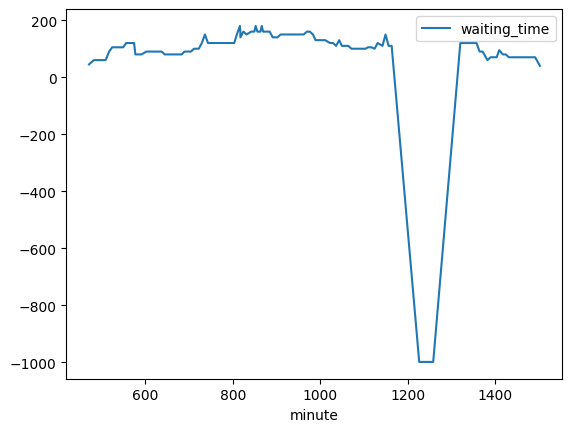

In [136]:
# nu even kijken of we dat kunnen plotten

#  voorgedefeinieerde selectiewaarden
date = '01/01/2015'
attraction = '7_dwarfs_train'

#  doe nu de query om die dan in een plot te gaan steken, eerst de query, geeft 135 rijen
df_waiting_posted.query("date == @date and attraction == @attraction")

#  gebruik dat dan in een plotje
(df_waiting_posted.query("date == @date and attraction == @attraction")
            .plot(x = 'minute',
                  y = 'waiting_time'))

#  probleem .. een sprong in de gegevens 20 tot 500 
#  2de probleem .. ineens een drop in de gegevens


In [137]:
print(df_waiting_posted.describe())
#  gemiddelde negatief ? vanwege min ? 
print(df_waiting_posted.waiting_time.min())
#  -999 ! Attractie is gesloten blijkbaar .. wordt zo ingebracht ... er zal moeten op gefilterd worden, want we moeten niet weten wanneer ze gesloten is

                            datetime  waiting_time        minute
count                       10113751  1.011375e+07  1.011375e+07
mean   2018-08-10 17:20:13.534183680 -9.962901e+01  9.243975e+02
min              2015-01-01 07:09:12 -9.990000e+02  1.800000e+02
25%              2017-01-14 20:27:11  1.000000e+01  7.060000e+02
50%              2018-08-19 09:27:07  2.000000e+01  9.190000e+02
75%              2019-12-22 19:13:02  4.500000e+01  1.134000e+03
max              2021-12-28 23:00:27  3.900000e+02  1.618000e+03
std                              NaN  3.493865e+02  2.585429e+02
-999.0


<Axes: xlabel='minute'>

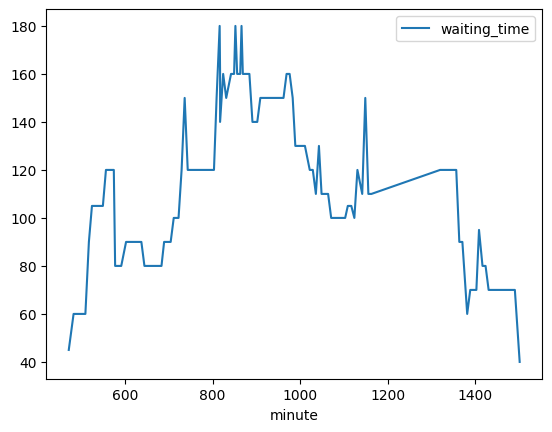

In [138]:
#  selecteer alle gegevens (indexen) waarvoor geldt dat ze -999 zijn
df_waiting_actual = df_waiting_actual.loc[df_waiting_actual.waiting_time > -998 ]
df_waiting_posted = df_waiting_posted.loc[df_waiting_posted.waiting_time > -998 ]

(df_waiting_posted.query("date == @date and attraction == @attraction")
            .plot(x = 'minute',
                  y = 'waiting_time'))

#  afbeelding nu beter, enkel die gap nog ..., zijn de x = 'minute' na middernacht (attractie open na middernacht). 
#  De hoeveelheid minuten na middernacht beginnen bij 0 en worden klein
#  als we weten dat attracties tot 03:00 'nachts maximaal open zijn en het park niet opent voor 03:00 's nachts, kunnen we dat oplossen
#  door de dag letterlijk 3 uren voorruit te schuiven zodat de 0 waarden vallen in 21:00 tot 23:59:59 

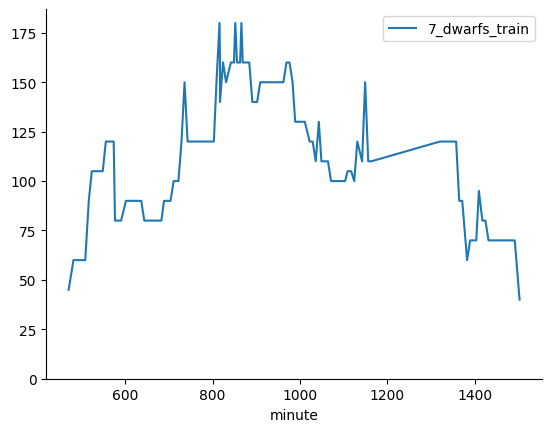

In [146]:
#  mooi maken van de plot

#  todo .. de legende is anders, we hebben meer lijntje, de y as begint op 0 en de topline (in de gevraagde afbeelding die je niet ziet dan enkel op de video)

fig, ax = plt.subplots()
(df_waiting_posted.query("date == @date and attraction == @attraction")
            .plot(x = 'minute',
                  y = 'waiting_time',
                  label = attraction,
                  ax = ax))
ax.set_ylim(bottom = 0)
ax.spines[['top','right']].set_visible(False)

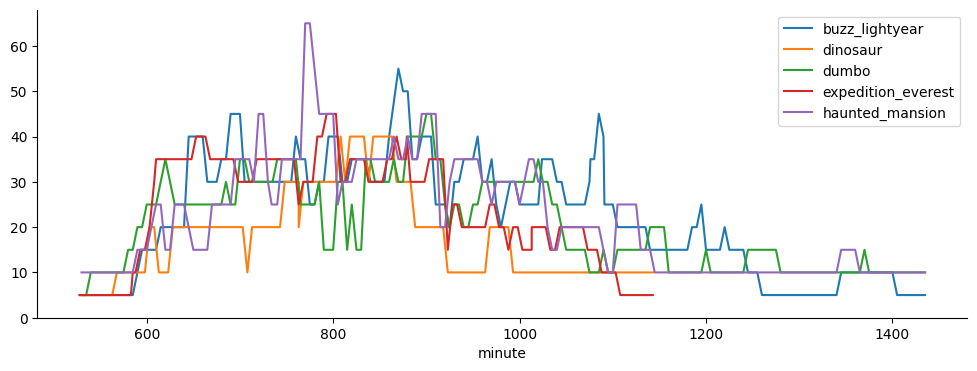

In [152]:
#  doe dat nu voor alle attracties

date = '03/01/2015'
# attractions = ['buzz_lightyear', 'dinosaur', 'dumbo', 'expedition_everest', 'haunted_mansion', '7_dwarfs_train' ]
attractions = ['buzz_lightyear', 'dinosaur', 'dumbo', 'expedition_everest', 'haunted_mansion']


fig, ax = plt.subplots(figsize = (12, 4)) # nummers size in inches
for attraction in attractions:
      (df_waiting_posted.query("date == @date and attraction == @attraction")
                  .plot(x = 'minute',
                        y = 'waiting_time',
                        label = attraction,
                        ax = ax))
      
ax.set_ylim(bottom = 0)
ax.spines[['top','right']].set_visible(False)

In [159]:
# Maak hier de functie die we hierboven hebben ontworpen

def visualize_waiting(df, attractions, date):

    fig, ax = plt.subplots(figsize = (12, 4)) # nummers size in inches
    for attraction in attractions:
        (df.query("date == @date and attraction == @attraction")
                    .plot(x = 'minute',
                            y = 'waiting_time',
                            label = attraction,
                            ax = ax,
                            marker = 'o'))
        
    ax.set_ylim(bottom = 0)
    ax.spines[['top','right']].set_visible(False)

    return fig, ax

(<Figure size 1200x400 with 1 Axes>, <Axes: xlabel='minute'>)

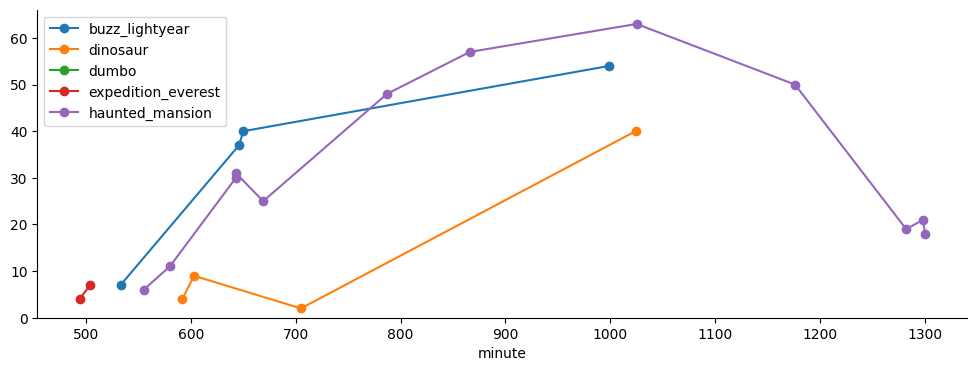

In [160]:
date = '01/02/2015'
attractions = ['buzz_lightyear', 'dinosaur', 'dumbo', 'expedition_everest', 'haunted_mansion']

# visualize_waiting(df_waiting_posted, attractions, date)
visualize_waiting(df_waiting_actual, attractions, date)

# Stap 3 : voor welke attracties genoeg info over wachttijden